## Reproduction of Figure 2

Taking some notes here:
* M: The temporal variation in per mRNA
* Pt: Total amount of PER protein
* PN: Nuclear PER
* P0: Unphosphorylated PER
* P1: Phosphorylated PER
* P2: Cytosolic PER

- Rate of change in M  is given in equation 1a.
    - dM/dt is used in 1b only.
- Rate of change in P0 is given in equation 1b.
- Rate of change in P1 is given in equation 1c.
- Rate of change in P2 is given in equation 1d.
- Rate of change in PN is given in equation 1e.
- Pt is calculated by equation 2: P0+P1+P2+PN

In [81]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [82]:
# Constant values (given below figure 2)
vs = 0.76
vm = 0.65
Km = 0.5
ks = 0.38
vd = 0.95
k1 = 1.9
k2 = 1.3
KI = 1
Kd = 0.2
n = 4
K1 = 2
K2 = 2
K3 = 2
K4 = 2
V1 = 3.2
V2 = 1.58
V3 = 5
V4 = 2.5

In [83]:
# Define initial conditions (given below figure 3)
# For the phase plot, there is another 'y'
y = [0.1,   # M
     0.25,  # P0
     0.25,  # P1
     0.25,  # P2
     0.25]  # PN

In [84]:
# Define time vector
t = np.linspace(0, 72, 10000)

In [85]:
# Define ODE system
def system(y, t, vs, vm, Km, ks, vd, k1, k2, KI, Kd, n, K1, K2, K3, K4, V1, V2, V3, V4):
    M = y[0]
    P0 = y[1]
    P1 = y[2]
    P2 = y[3]
    PN = y[4]
    dM_dt = vs*(KI**n)/(KI**n+PN**n) - vm*(M/(Km+M))
    dP0_dt = ks*M - V1*(P0/(K1+P0)) + V2*(P1/(K2+P1))
    dP1_dt = V1*(P0/(K1+P0)) - V2*(P1/(K2+P1)) - V3*(P1/(K3+P1)) + V4*(P2/(K4+P2))
    dP2_dt = V3*(P1/(K3+P1)) - V4*(P2/(K4+P2)) - k1*P2 + k2*PN - vd*(P2/(Kd+P2))
    dPN_dt = k1*P2 - k2*PN
    return [dM_dt, dP0_dt, dP1_dt, dP2_dt, dPN_dt]

In [86]:
# Solve ODE system
solution = odeint(system, y, t, args=(vs, vm, Km, ks, vd, k1, k2, KI, Kd, n, K1, K2, K3, K4, V1, V2, V3, V4))

In [87]:
# Extract variables from solution
M_S = solution[:,0]
P0_S = solution[:,1]
P1_S = solution[:,2]
P2_S = solution[:,3]
PN_S = solution[:,4]
Pt_S = np.array([P0_S, P1_S, P2_S, PN_S]).sum(axis=0)

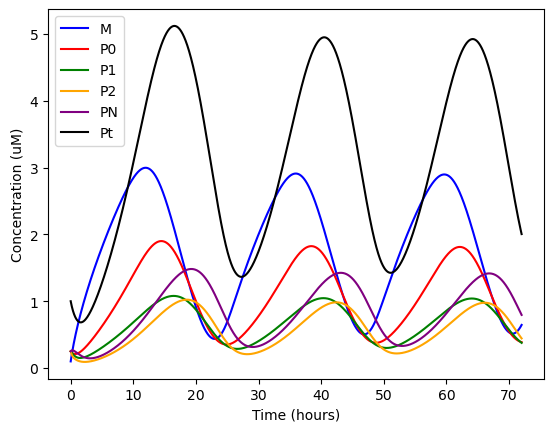

In [88]:
# Plot results
plt.plot(t, M_S, color='blue', label='M')
plt.plot(t, P0_S, color='red', label='P0')
plt.plot(t, P1_S, color='green', label='P1')
plt.plot(t, P2_S, color='orange', label='P2')
plt.plot(t, PN_S, color='purple', label='PN')
plt.plot(t, Pt_S, color='black', label='Pt')
plt.xlabel("Time (hours)")
plt.ylabel("Concentration (uM)")
plt.legend()
plt.show()

The values represented by the lines are the same in the paper. However, the paper uses different scales for different lines, which can be seen in the vertical axis on the right on the paper. This is why we see a slight difference in the shape of my plot, even though it tells the same story.

## Reproduction of Figure 3.

This plot is drawn for 2 different initial values. 

y1 = [0.1, 0.25, 0.25, 0.25, 0.25]<br>
y2 = [1.9, 0.8, 0.8, 0.8, 0.8]<br>

Also, it appears that this plot is drawn for a time period which is longer than 72 hours.

In [91]:
t = np.linspace(0, 144, 10000) # The time period is chosen as 144 hours.

Below, I am repeating the same process I've done for the first question.<br>
This time,<br>
* 'y' variable is 'y1' and 'y2',
* 'M_S' variable is 'M1S' and 'M2S',
* 'Pt_S' variable is 'Pt1S' and 'Pt2S'.

In [93]:
# Define first initial conditions
y1 = [0.1,   # M
      0.25,  # P0
      0.25,  # P1
      0.25,  # P2
      0.25]  # PN

# Define ODE system
def system(y1, t, vs, vm, Km, ks, vd, k1, k2, KI, Kd, n, K1, K2, K3, K4, V1, V2, V3, V4):
    M = y1[0]
    P0 = y1[1]
    P1 = y1[2]
    P2 = y1[3]
    PN = y1[4]
    dM_dt = vs*(KI**n)/(KI**n+PN**n) - vm*(M/(Km+M))
    dP0_dt = ks*M - V1*(P0/(K1+P0)) + V2*(P1/(K2+P1))
    dP1_dt = V1*(P0/(K1+P0)) - V2*(P1/(K2+P1)) - V3*(P1/(K3+P1)) + V4*(P2/(K4+P2))
    dP2_dt = V3*(P1/(K3+P1)) - V4*(P2/(K4+P2)) - k1*P2 + k2*PN - vd*(P2/(Kd+P2))
    dPN_dt = k1*P2 - k2*PN
    return [dM_dt, dP0_dt, dP1_dt, dP2_dt, dPN_dt]

# Solve ODE system
solution = odeint(system, y1, t, args=(vs, vm, Km, ks, vd, k1, k2, KI, Kd, n, K1, K2, K3, K4, V1, V2, V3, V4))

# Extract variables from solution
M1S = solution[:,0]
P0_S = solution[:,1]
P1_S = solution[:,2]
P2_S = solution[:,3]
PN_S = solution[:,4]
Pt1S = np.array([P0_S, P1_S, P2_S, PN_S]).sum(axis=0)

In [94]:
# Define second initial conditions
y2 = [1.9,   # M
      0.8,   # P0
      0.8,   # P1
      0.8,   # P2
      0.8]   # PN

# Define ODE system
def system(y2, t, vs, vm, Km, ks, vd, k1, k2, KI, Kd, n, K1, K2, K3, K4, V1, V2, V3, V4):
    M = y2[0]
    P0 = y2[1]
    P1 = y2[2]
    P2 = y2[3]
    PN = y2[4]
    dM_dt = vs*(KI**n)/(KI**n+PN**n) - vm*(M/(Km+M))
    dP0_dt = ks*M - V1*(P0/(K1+P0)) + V2*(P1/(K2+P1))
    dP1_dt = V1*(P0/(K1+P0)) - V2*(P1/(K2+P1)) - V3*(P1/(K3+P1)) + V4*(P2/(K4+P2))
    dP2_dt = V3*(P1/(K3+P1)) - V4*(P2/(K4+P2)) - k1*P2 + k2*PN - vd*(P2/(Kd+P2))
    dPN_dt = k1*P2 - k2*PN
    return [dM_dt, dP0_dt, dP1_dt, dP2_dt, dPN_dt]

# Solve ODE system
solution = odeint(system, y2, t, args=(vs, vm, Km, ks, vd, k1, k2, KI, Kd, n, K1, K2, K3, K4, V1, V2, V3, V4))

# Extract variables from solution
M2S = solution[:,0]
P0_S = solution[:,1]
P1_S = solution[:,2]
P2_S = solution[:,3]
PN_S = solution[:,4]
Pt2S = np.array([P0_S, P1_S, P2_S, PN_S]).sum(axis=0)

Text(0, 0.5, 'per mRNA (M)')

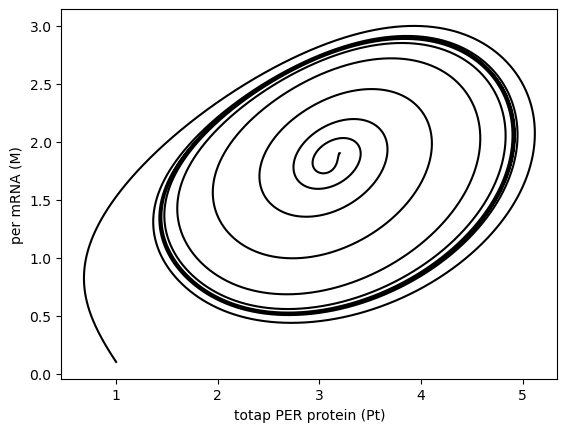

In [95]:
# Plot results
plt.plot(Pt1S, M1S, color = 'black')
plt.plot(Pt2S, M2S, color = 'black')
plt.xlabel("totap PER protein (Pt)")
plt.ylabel("per mRNA (M)")
